#Comparisons for differing values of $\beta$ and its effect on EBTEL emission measure

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
single_fluid_root = '/Users/willbarnes/Documents/Rice/Research/EBTEL_repo/'
two_fluid_root = '/Users/willbarnes/Documents/Rice/Research/EBTEL-2fluid_repo/'
import sys
sys.path.append(single_fluid_root+'bin/')
sys.path.append(two_fluid_root+'bin/')
import ebtel_wrapper as sfw
import ebtel2fl_run as tfw
import ebtel2fl_plot as tfp
reload(sfw)
reload(tfw)
plt.close('all')

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


When calculating the heat flux, we often use the classical expresssion, $$F_C=-\kappa_0T^{5/2}\frac{\partial T}{\partial s}.$$ However, for low densities, this approximation breaks down because the density is not large enough to support the heat flux, leading to artificially cooler plasmas. To solve this problem, an artificial flux limit, $F_s$ is often imposed to curb the runaway heat flux for low densities, where we say that that the heat flux **saturates** at $F_s$, given by, $$F_s=-\beta\frac{3k^{3/2}}{2m_e^{1/2}}nT^{3/2}.$$ Then the total heat flux is written as $$F_0=-\frac{F_CF_s}{(F_C^2 + F_s^2)^{1/2}}.$$  

$\beta$ in $F_s$ is often assumed (in the case of the EBTEL model for example) to be 1/6. However, others (e.g. the HYDRAD model) have used $\beta=1$. In turns out that these differing $\beta$ values can strongly affect the peak temperature seen during the beginning of the heating phase. How does this happen? Without the flux limit ($\beta=0$), conductive cooling will be artifically high during the initial heating phase (when the temperature spikes) even though the density is not actually able to support such a heat flux. Introducing a flux limit ensures that $F_C$ never surpasses $F_s$, the latter of which has a density dependence. Lowering the coefficient $\beta$ on the flux limit means that this limit is imposed earlier on, allowing for less runaway cooling and consequently higher temperatures.  

We want to look at whether this choice of $\beta$ has any impact on the resulting emission measure. We will look at examples for isolated and repeated heating events at different heating frequencies for both the single- and two-fluid model. 

##Single-fluid code: one heating event

###$\beta=1/6$

First, we'll run the single-fluid code for a single event using $\beta=1/6$. We must first configure the dictionary, then print the dictionary, and finally run the code and examine the output.

In [2]:
#build input dictionary
#Configure all static dictionary options
config_dict = {'usage_option':'dem','rad_option':'rk','dem_option':'new','heat_flux_option':'limited','solver':'euler','ic_mode':'st_eq','print_plasma_params':'True'}
config_dict['output_file'] = single_fluid_root+'data/em_testing'
config_dict['total_time'] = 5000
config_dict['tau'] = 1.0
config_dict['rka_error'] = 1.0e-6
config_dict['index_dem'] = 451
config_dict['sat_limit'] = 0.166667
config_dict['h_back'] = 3.4e-6
config_dict['heating_shape'] = 'triangle'
config_dict['t_start_switch'] = 'uniform'
config_dict['t_end_switch'] = 'uniform'
config_dict['T0'] = 1.0e+6
config_dict['n0'] = 1.0e+8
config_dict['t_start'] = 50.0
config_dict['t_pulse_half'] = 50.0
config_dict['mean_t_start'] = 1000
config_dict['std_t_start'] = 1000

#Configure directory-level parameters
config_dict['num_events'] = 1
config_dict['heat_species'] = 'electron'
config_dict['amp_switch'] = 'uniform'
config_dict['alpha'] = -1.5
config_dict['loop_length'] = 40.0
config_dict['amp0'] = 0.05
config_dict['amp1'] = 0.5
config_dict['h_nano'] = 0.38

In [3]:
#print the config file
sfw.print_xml_config(config_dict,config_file=single_fluid_root+'config/em_testing_config.xml')

In [4]:
#run the code
sfw.run_ebtel(single_fluid_root+'bin/',single_fluid_root+'config/',config_file='em_testing_config.xml')

************************************************************************************
            Enthalpy Based Thermal Evolution of Loops (EBTEL)                       
************************************************************************************

Original code written in IDL by J.A. Klimchuk, S. Patsourakos, P.J. Cargill
See Klimchuk, J.A, S. Patsourakos & P.J. Cargill 2008, ApJ 682:1351-2362
See also Cargill, P.J., S.J. Bradshaw & J.A. Klimchuk 2012, ApJ 752:161-174

Translation into the C Programming Language by Will Barnes,
Dept. of Physics & Astronomy, Rice University (2014)
************************************************************************************

INPUTS
------
Total time: 5000 s
Time step: 1.000000 s
Loop half-length: 40.000000 Mm
Usage option(see documentation): dem
Heating pulse shape: triangle
Solving equations using Euler method
Using Raymond-Klimchuk Loss Function
Using limited method to calculate the heat flux
Using new method to calculate DEM in the TR


In [5]:
#load EM output
temp = np.loadtxt(single_fluid_root+'data/em_testing_dem.txt')
sf_beta16_tdem = temp[:,0]
sf_beta16_em = temp[:,4]

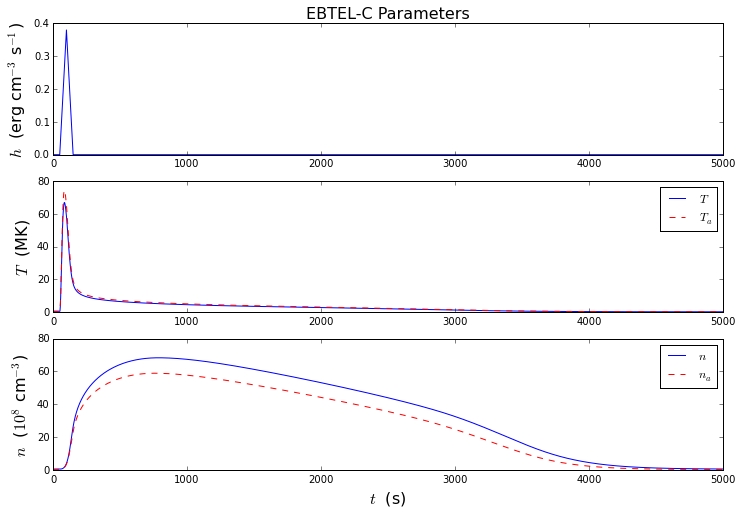

In [6]:
#check the output
sfw.plot_ebtel(single_fluid_root+'data/','em_testing.txt')

###$\beta=1$

Now, let's change the flux-limiting coefficient and then run the code again to compare the resulting emission measure.

In [7]:
config_dict['sat_limit'] = 1.0 

In [8]:
#print the config file
sfw.print_xml_config(config_dict,config_file=single_fluid_root+'config/em_testing_config.xml')
#run the code
sfw.run_ebtel(single_fluid_root+'bin/',single_fluid_root+'config/',config_file='em_testing_config.xml')

************************************************************************************
            Enthalpy Based Thermal Evolution of Loops (EBTEL)                       
************************************************************************************

Original code written in IDL by J.A. Klimchuk, S. Patsourakos, P.J. Cargill
See Klimchuk, J.A, S. Patsourakos & P.J. Cargill 2008, ApJ 682:1351-2362
See also Cargill, P.J., S.J. Bradshaw & J.A. Klimchuk 2012, ApJ 752:161-174

Translation into the C Programming Language by Will Barnes,
Dept. of Physics & Astronomy, Rice University (2014)
************************************************************************************

INPUTS
------
Total time: 5000 s
Time step: 1.000000 s
Loop half-length: 40.000000 Mm
Usage option(see documentation): dem
Heating pulse shape: triangle
Solving equations using Euler method
Using Raymond-Klimchuk Loss Function
Using limited method to calculate the heat flux
Using new method to calculate DEM in the TR


In [9]:
#load EM output
temp = np.loadtxt(single_fluid_root+'data/em_testing_dem.txt')
sf_beta1_tdem = temp[:,0]
sf_beta1_em = temp[:,4]

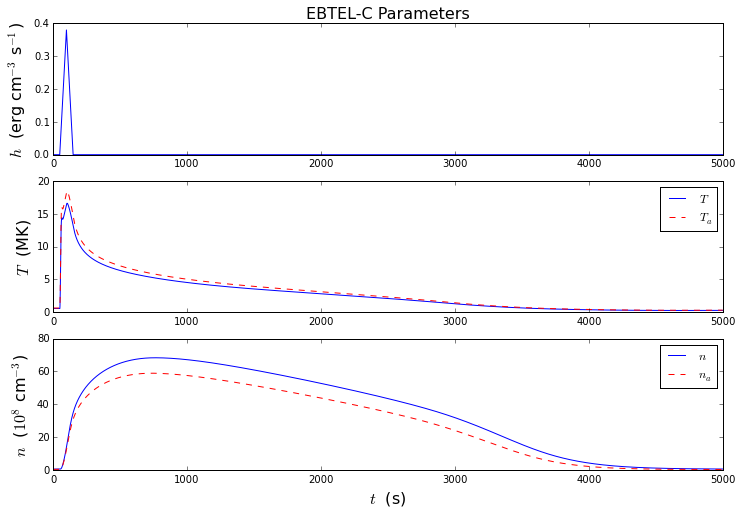

In [10]:
#check the output
sfw.plot_ebtel(single_fluid_root+'data/','em_testing.txt')

###Emission Measure Comparison

Now, let's compare the two emission measure curves for the $\beta=1/6$ and the $\beta=1$ cases.

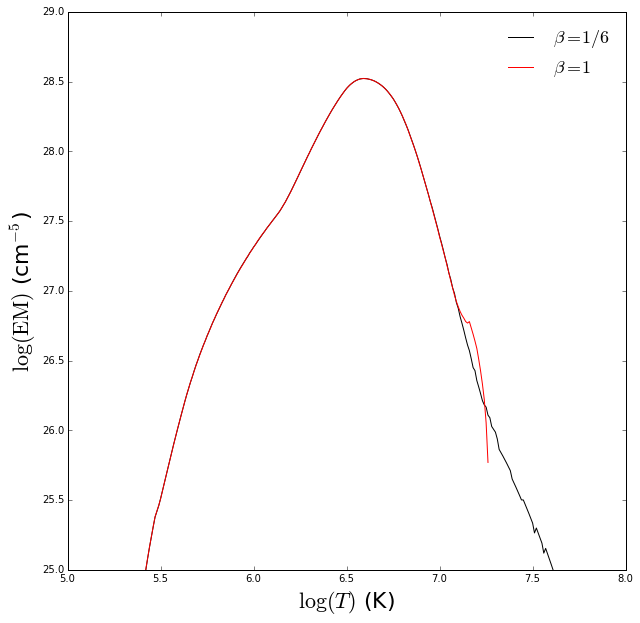

In [11]:
fig=plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(sf_beta16_tdem,sf_beta16_em,'k',label=r'$\beta=1/6$')
ax.plot(sf_beta1_tdem,sf_beta1_em,'r',label=r'$\beta=1$')
ax.set_xlim([5.0,8.0])
ax.set_ylim([25,29])
ax.set_xlabel(r'$\log (T)$ (K)',fontsize=22)
ax.set_ylabel(r'$\log(\mathrm{EM})$ (cm$^{-5}$)',fontsize=22)
lg = ax.legend(loc='best',fontsize=18)
lg.draw_frame(False)

##Single-fluid code: high-frequency heating

Let's configure the start time and end time arrays for multiple heating events at high-heating frequencies with uniform event amplitudes. 

In [17]:
#function for building start and end time arrays
def make_time_arrays(conf_dict,ti):
    conf_dict['num_events'] = int(np.ceil(conf_dict['total_time']/(2.0*conf_dict['t_pulse_half'] + ti)))
    conf_dict['start_time_array'],conf_dict['end_time_array'] = np.empty(conf_dict['num_events']),np.empty(conf_dict['num_events'])
    for i in range(conf_dict['num_events']):
        conf_dict['start_time_array'][i] = i*(2.0*conf_dict['t_pulse_half'] + ti)
        conf_dict['end_time_array'][i] = conf_dict['start_time_array'][i] + 2.0*conf_dict['t_pulse_half']
        
    return conf_dict

In [20]:
#relevant heating options for multiple events
config_dict['t_start_switch'] = 'file'
config_dict['t_end_switch'] = 'file'
config_dict['amp_switch'] = 'uniform'
config_dict['total_time'] = 80000.0
config_dict['heat_species'] = 'electron'
Hn = 8.3e-3

In [21]:
#create start and end time arrays
config_dict = make_time_arrays(config_dict,250)
#calculate uniform amplitude
config_dict['h_nano'] = 2.0*Hn*config_dict['total_time']/(config_dict['num_events']*2.0*config_dict['t_pulse_half'])

###$\beta=1$

In [22]:
#print config file
config_dict['output_file'] = single_fluid_root+'data/em_testing'
sfw.print_xml_config(config_dict,config_file=single_fluid_root+'config/em_testing_config.xml')
#run the code
sfw.run_ebtel(single_fluid_root+'bin/',single_fluid_root+'config/',config_file='em_testing_config.xml')

************************************************************************************
            Enthalpy Based Thermal Evolution of Loops (EBTEL)                       
************************************************************************************

Original code written in IDL by J.A. Klimchuk, S. Patsourakos, P.J. Cargill
See Klimchuk, J.A, S. Patsourakos & P.J. Cargill 2008, ApJ 682:1351-2362
See also Cargill, P.J., S.J. Bradshaw & J.A. Klimchuk 2012, ApJ 752:161-174

Translation into the C Programming Language by Will Barnes,
Dept. of Physics & Astronomy, Rice University (2014)
************************************************************************************

INPUTS
------
Total time: 80000 s
Time step: 1.000000 s
Loop half-length: 40.000000 Mm
Usage option(see documentation): dem
Heating pulse shape: triangle
Solving equations using Euler method
Using Raymond-Klimchuk Loss Function
Using limited method to calculate the heat flux
Using new method to calculate DEM in the TR

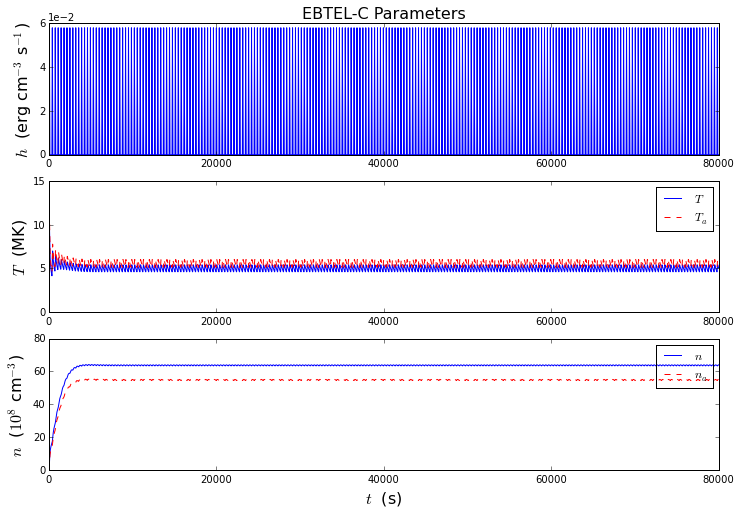

In [23]:
#check the output
sfw.plot_ebtel(single_fluid_root+'data/','em_testing.txt')

In [24]:
#load EM output
temp = np.loadtxt(single_fluid_root+'data/em_testing_dem.txt')
sf_beta1_tdem = temp[:,0]
sf_beta1_em = temp[:,4]

###$\beta=1/6$

In [25]:
#change beta value
config_dict['sat_limit'] = 0.166667
#print config file
sfw.print_xml_config(config_dict,config_file=single_fluid_root+'config/em_testing_config.xml')
#run the code
sfw.run_ebtel(single_fluid_root+'bin/',single_fluid_root+'config/',config_file='em_testing_config.xml')

************************************************************************************
            Enthalpy Based Thermal Evolution of Loops (EBTEL)                       
************************************************************************************

Original code written in IDL by J.A. Klimchuk, S. Patsourakos, P.J. Cargill
See Klimchuk, J.A, S. Patsourakos & P.J. Cargill 2008, ApJ 682:1351-2362
See also Cargill, P.J., S.J. Bradshaw & J.A. Klimchuk 2012, ApJ 752:161-174

Translation into the C Programming Language by Will Barnes,
Dept. of Physics & Astronomy, Rice University (2014)
************************************************************************************

INPUTS
------
Total time: 80000 s
Time step: 1.000000 s
Loop half-length: 40.000000 Mm
Usage option(see documentation): dem
Heating pulse shape: triangle
Solving equations using Euler method
Using Raymond-Klimchuk Loss Function
Using limited method to calculate the heat flux
Using new method to calculate DEM in the TR

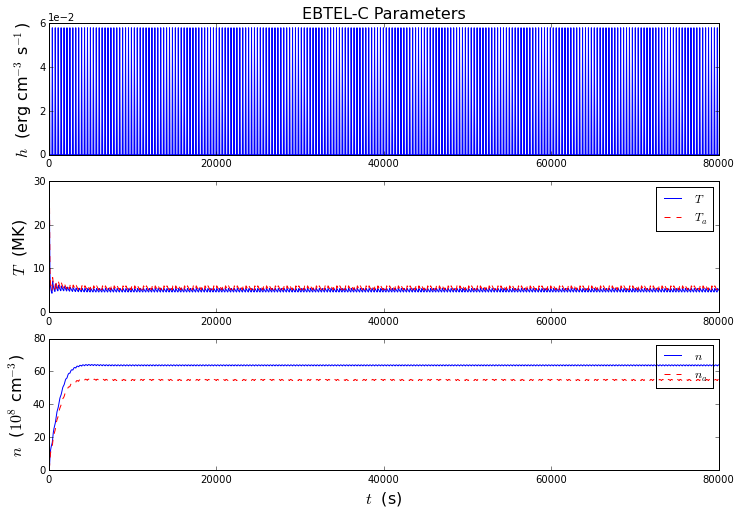

In [26]:
#check the output
sfw.plot_ebtel(single_fluid_root+'data/','em_testing.txt')

In [27]:
#load EM output
temp = np.loadtxt(single_fluid_root+'data/em_testing_dem.txt')
sf_beta16_tdem = temp[:,0]
sf_beta16_em = temp[:,4]

###Emission Measure Comparison

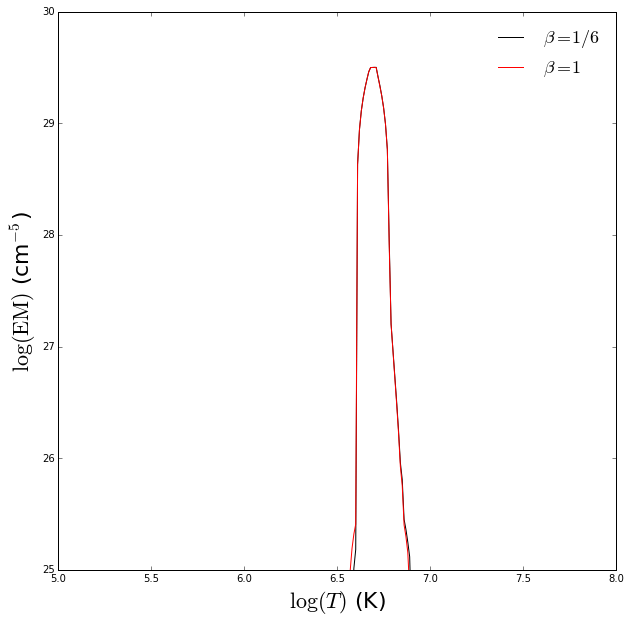

In [29]:
fig=plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(sf_beta16_tdem,sf_beta16_em,'k',label=r'$\beta=1/6$')
ax.plot(sf_beta1_tdem,sf_beta1_em,'r',label=r'$\beta=1$')
ax.set_xlim([5.0,8.0])
ax.set_ylim([25,30])
ax.set_xlabel(r'$\log (T)$ (K)',fontsize=22)
ax.set_ylabel(r'$\log(\mathrm{EM})$ (cm$^{-5}$)',fontsize=22)
lg = ax.legend(loc='best',fontsize=18)
lg.draw_frame(False)

We can see that, for high-frequency heating, little to no difference can be seen in the $\mathrm{EM}$ betwen the $\beta=1$ and $\beta=1/6$ cases. They deviate from each other at high temperatures ($>10$ MK), but here the $\mathrm{EM}$ is so low that no instrument would be able to distinguish $\mathrm{EM}$ at these temperatures from the background. Additionally, this $\mathrm{EM}$ would probably not be produced anyway because of non-equilibrium ionization.

##Single-fluid code: intermediate-frequency heating

Now, we're going to increase the time between heating events to 2500 s and thus decrease the heating frequency and see if differing values of $\beta$ affect our resulting $\mathrm{EM}$.

In [35]:
#create start and end time arrays
config_dict = make_time_arrays(config_dict,2500)
#calculate uniform amplitude
config_dict['h_nano'] = 2.0*Hn*config_dict['total_time']/(config_dict['num_events']*2.0*config_dict['t_pulse_half'])

###$\beta=1/6$

In [36]:
#change value of beta
config_dict['sat_limit'] = 0.166667
#print the config file
sfw.print_xml_config(config_dict,config_file=single_fluid_root+'config/em_testing_config.xml')
#run the code
sfw.run_ebtel(single_fluid_root+'bin/',single_fluid_root+'config/',config_file='em_testing_config.xml')

************************************************************************************
            Enthalpy Based Thermal Evolution of Loops (EBTEL)                       
************************************************************************************

Original code written in IDL by J.A. Klimchuk, S. Patsourakos, P.J. Cargill
See Klimchuk, J.A, S. Patsourakos & P.J. Cargill 2008, ApJ 682:1351-2362
See also Cargill, P.J., S.J. Bradshaw & J.A. Klimchuk 2012, ApJ 752:161-174

Translation into the C Programming Language by Will Barnes,
Dept. of Physics & Astronomy, Rice University (2014)
************************************************************************************

INPUTS
------
Total time: 80000 s
Time step: 1.000000 s
Loop half-length: 40.000000 Mm
Usage option(see documentation): dem
Heating pulse shape: triangle
Solving equations using Euler method
Using Raymond-Klimchuk Loss Function
Using limited method to calculate the heat flux
Using new method to calculate DEM in the TR

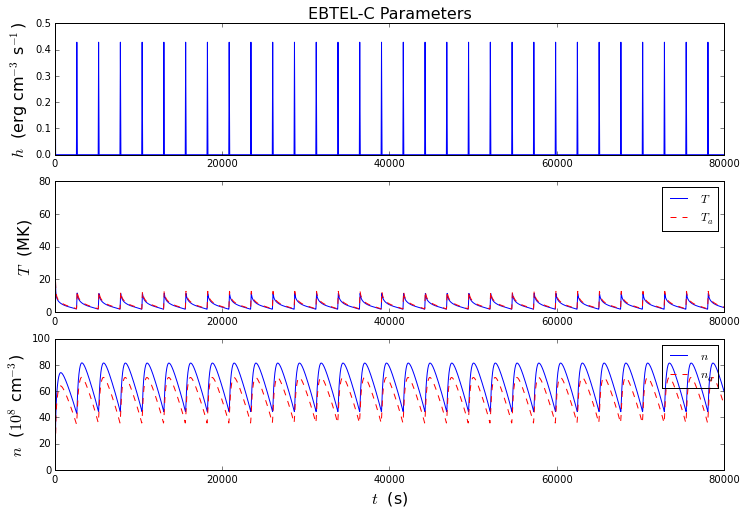

In [37]:
#check the output
sfw.plot_ebtel(single_fluid_root+'data/','em_testing.txt')

In [38]:
#load EM output
temp = np.loadtxt(single_fluid_root+'data/em_testing_dem.txt')
sf_beta16_tdem = temp[:,0]
sf_beta16_em = temp[:,4]

###$\beta=1$

************************************************************************************
            Enthalpy Based Thermal Evolution of Loops (EBTEL)                       
************************************************************************************

Original code written in IDL by J.A. Klimchuk, S. Patsourakos, P.J. Cargill
See Klimchuk, J.A, S. Patsourakos & P.J. Cargill 2008, ApJ 682:1351-2362
See also Cargill, P.J., S.J. Bradshaw & J.A. Klimchuk 2012, ApJ 752:161-174

Translation into the C Programming Language by Will Barnes,
Dept. of Physics & Astronomy, Rice University (2014)
************************************************************************************

INPUTS
------
Total time: 80000 s
Time step: 1.000000 s
Loop half-length: 40.000000 Mm
Usage option(see documentation): dem
Heating pulse shape: triangle
Solving equations using Euler method
Using Raymond-Klimchuk Loss Function
Using limited method to calculate the heat flux
Using new method to calculate DEM in the TR

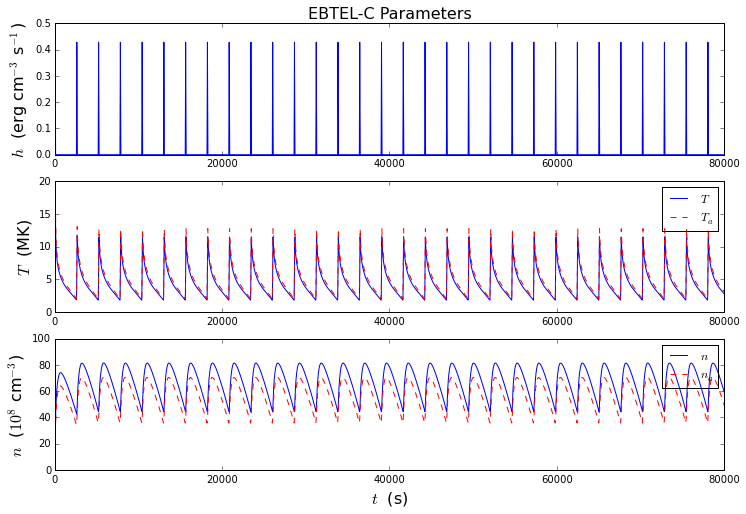

In [39]:
#change value of beta
config_dict['sat_limit'] = 1.0
#print the config file
sfw.print_xml_config(config_dict,config_file=single_fluid_root+'config/em_testing_config.xml')
#run the code
sfw.run_ebtel(single_fluid_root+'bin/',single_fluid_root+'config/',config_file='em_testing_config.xml')
#check the output
sfw.plot_ebtel(single_fluid_root+'data/','em_testing.txt')
#load EM output
temp = np.loadtxt(single_fluid_root+'data/em_testing_dem.txt')
sf_beta1_tdem = temp[:,0]
sf_beta1_em = temp[:,4]

###Emission Measure Comparison

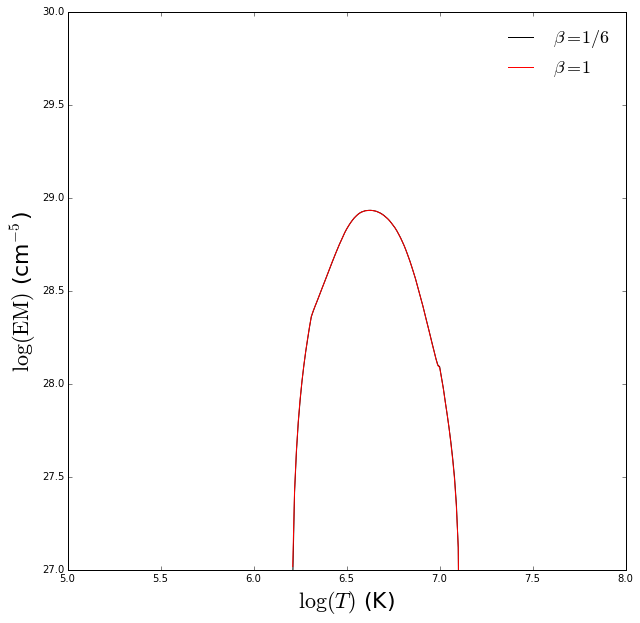

In [41]:
fig=plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(sf_beta16_tdem,sf_beta16_em,'k',label=r'$\beta=1/6$')
ax.plot(sf_beta1_tdem,sf_beta1_em,'r',label=r'$\beta=1$')
ax.set_xlim([5.0,8.0])
ax.set_ylim([27,30])
ax.set_xlabel(r'$\log (T)$ (K)',fontsize=22)
ax.set_ylabel(r'$\log(\mathrm{EM})$ (cm$^{-5}$)',fontsize=22)
lg = ax.legend(loc='best',fontsize=18)
lg.draw_frame(False)

##Single-fluid code: low-frequency heating

Now, let's turn down the heating frequency even further and increase the waiting time between events to 5000 s.

In [42]:
#create start and end time arrays
config_dict = make_time_arrays(config_dict,5000)
#calculate uniform amplitude
config_dict['h_nano'] = 2.0*Hn*config_dict['total_time']/(config_dict['num_events']*2.0*config_dict['t_pulse_half'])

###$\beta=1/6$

************************************************************************************
            Enthalpy Based Thermal Evolution of Loops (EBTEL)                       
************************************************************************************

Original code written in IDL by J.A. Klimchuk, S. Patsourakos, P.J. Cargill
See Klimchuk, J.A, S. Patsourakos & P.J. Cargill 2008, ApJ 682:1351-2362
See also Cargill, P.J., S.J. Bradshaw & J.A. Klimchuk 2012, ApJ 752:161-174

Translation into the C Programming Language by Will Barnes,
Dept. of Physics & Astronomy, Rice University (2014)
************************************************************************************

INPUTS
------
Total time: 80000 s
Time step: 1.000000 s
Loop half-length: 40.000000 Mm
Usage option(see documentation): dem
Heating pulse shape: triangle
Solving equations using Euler method
Using Raymond-Klimchuk Loss Function
Using limited method to calculate the heat flux
Using new method to calculate DEM in the TR

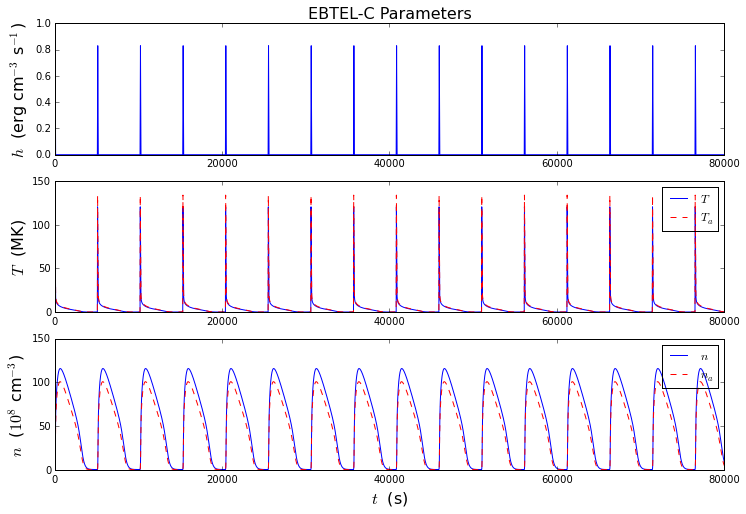

In [45]:
#change value of beta
config_dict['sat_limit'] = 0.166667
#print the config file
sfw.print_xml_config(config_dict,config_file=single_fluid_root+'config/em_testing_config.xml')
#run the code
sfw.run_ebtel(single_fluid_root+'bin/',single_fluid_root+'config/',config_file='em_testing_config.xml')
#check the output
sfw.plot_ebtel(single_fluid_root+'data/','em_testing.txt')
#load EM output
temp = np.loadtxt(single_fluid_root+'data/em_testing_dem.txt')
sf_beta16_tdem = temp[:,0]
sf_beta16_em = temp[:,4]

###$\beta=1.0$

************************************************************************************
            Enthalpy Based Thermal Evolution of Loops (EBTEL)                       
************************************************************************************

Original code written in IDL by J.A. Klimchuk, S. Patsourakos, P.J. Cargill
See Klimchuk, J.A, S. Patsourakos & P.J. Cargill 2008, ApJ 682:1351-2362
See also Cargill, P.J., S.J. Bradshaw & J.A. Klimchuk 2012, ApJ 752:161-174

Translation into the C Programming Language by Will Barnes,
Dept. of Physics & Astronomy, Rice University (2014)
************************************************************************************

INPUTS
------
Total time: 80000 s
Time step: 1.000000 s
Loop half-length: 40.000000 Mm
Usage option(see documentation): dem
Heating pulse shape: triangle
Solving equations using Euler method
Using Raymond-Klimchuk Loss Function
Using limited method to calculate the heat flux
Using new method to calculate DEM in the TR

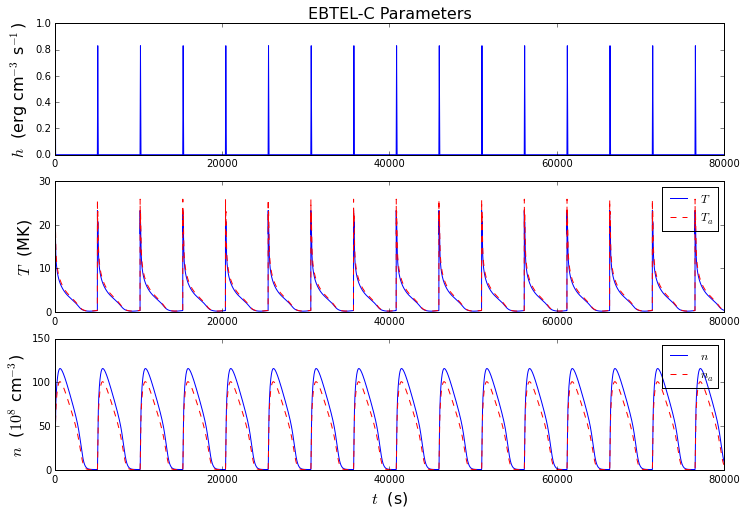

In [46]:
#change value of beta
config_dict['sat_limit'] = 1.0
#print the config file
sfw.print_xml_config(config_dict,config_file=single_fluid_root+'config/em_testing_config.xml')
#run the code
sfw.run_ebtel(single_fluid_root+'bin/',single_fluid_root+'config/',config_file='em_testing_config.xml')
#check the output
sfw.plot_ebtel(single_fluid_root+'data/','em_testing.txt')
#load EM output
temp = np.loadtxt(single_fluid_root+'data/em_testing_dem.txt')
sf_beta1_tdem = temp[:,0]
sf_beta1_em = temp[:,4]

###Emission Measure Comparison

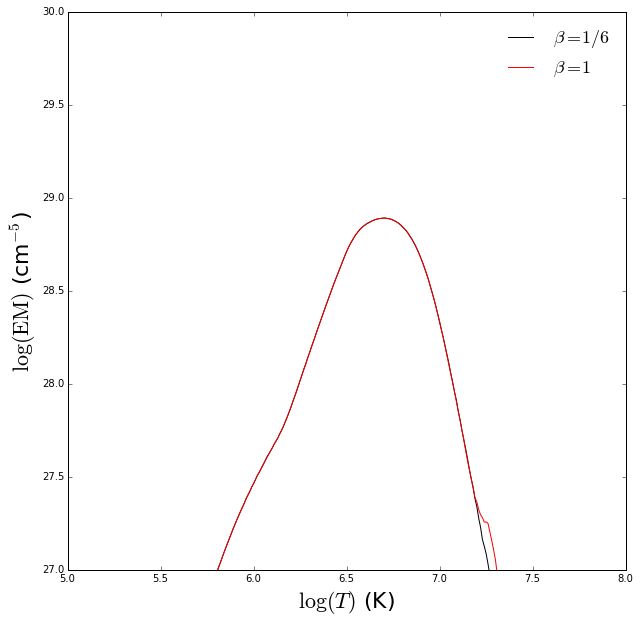

In [47]:
fig=plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(sf_beta16_tdem,sf_beta16_em,'k',label=r'$\beta=1/6$')
ax.plot(sf_beta1_tdem,sf_beta1_em,'r',label=r'$\beta=1$')
ax.set_xlim([5.0,8.0])
ax.set_ylim([27,30])
ax.set_xlabel(r'$\log (T)$ (K)',fontsize=22)
ax.set_ylabel(r'$\log(\mathrm{EM})$ (cm$^{-5}$)',fontsize=22)
lg = ax.legend(loc='best',fontsize=18)
lg.draw_frame(False)

So, we can see that changing $\beta$ makes next to no difference. Even though the $\beta=1/6$ case allows for much higher temperatures than the $\beta=1$ case, these extremely high temperatures are so short-lived and the densities coincident with them are so small that they make little to no difference in the resulting emission measure. 